Project root added to sys.path: d:\Handwritten Digit Recognition
Epoch 1/8


d:\Handwritten Digit Recognition\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 3s - 7ms/step - accuracy: 0.8844 - loss: 0.3875
Epoch 2/8
469/469 - 2s - 5ms/step - accuracy: 0.9506 - loss: 0.1653
Epoch 3/8
469/469 - 2s - 5ms/step - accuracy: 0.9624 - loss: 0.1232
Epoch 4/8
469/469 - 3s - 6ms/step - accuracy: 0.9697 - loss: 0.0990
Epoch 5/8
469/469 - 3s - 6ms/step - accuracy: 0.9736 - loss: 0.0842
Epoch 6/8
469/469 - 3s - 6ms/step - accuracy: 0.9761 - loss: 0.0759
Epoch 7/8
469/469 - 2s - 4ms/step - accuracy: 0.9790 - loss: 0.0674
Epoch 8/8
469/469 - 2s - 4ms/step - accuracy: 0.9809 - loss: 0.0615
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 Test Accuracy: 0.9788
⏱ Training time: 20.33 sec
⏱ Prediction time: 0.51 sec

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       

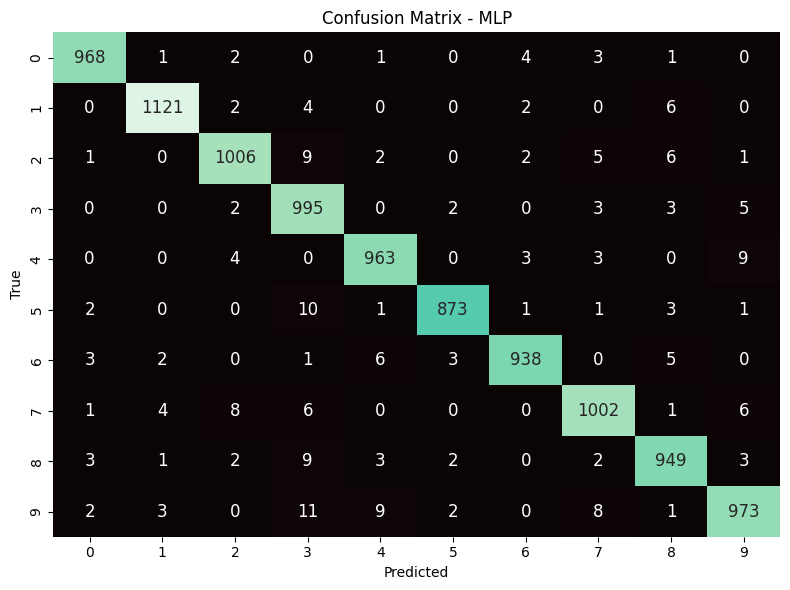

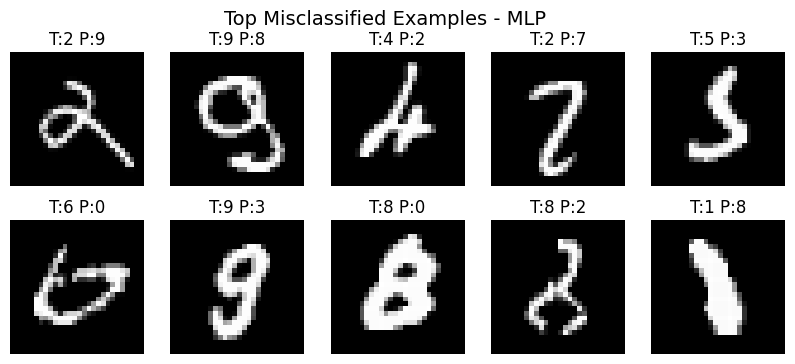

In [3]:
%run ../utils/init_notebook.py

from utils.data_loader import load_mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load data (normalize recommended for MLP)
X_train, y_train, X_test, y_test = load_mnist(normalise=True)

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
start_train = time.time()
model.fit(X_train_flat, y_train_cat, epochs=8, batch_size=128, verbose=2)
end_train = time.time()

# Prediction
start_pred = time.time()
y_pred_prob = model.predict(X_test_flat)
y_pred_mlp = np.argmax(y_pred_prob, axis=1)
end_pred = time.time()

# Accuracy
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"\n Test Accuracy: {acc_mlp:.4f}")
print(f"⏱ Training time: {end_train - start_train:.2f} sec")
print(f"⏱ Prediction time: {end_pred - start_pred:.2f} sec")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="mako", cbar=False, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLP")
plt.tight_layout()
plt.show()

# Show misclassified examples
misclassified_idx_mlp = np.where(y_pred_mlp != y_test)[0]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_idx_mlp[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"T:{y_test[idx]} P:{y_pred_mlp[idx]}")
    plt.axis('off')
plt.suptitle("Top Misclassified Examples - MLP", fontsize=14)
plt.show()

In [4]:
import os
import pandas as pd
import joblib

# Path for accuracy log file
ACC_LOG = "results/model_accuracies.csv"

# Append model name + accuracy
model_name = "Multi layer Perceptron"  

results_dir = os.path.join("..", "results")
os.makedirs(results_dir, exist_ok=True)
results_file = os.path.join(results_dir, "accuracies.csv")

# Append or Create CSV
if os.path.exists(results_file):
    df = pd.read_csv(results_file)
    df = df[["model_name", "accuracy_value"]] if "accuracy_value" in df.columns else pd.DataFrame(columns=["model_name", "accuracy_value"])
else:
    df = pd.DataFrame(columns=["model_name", "accuracy_value"])

# Remove old entry if model already logged (to avoid duplicates)
df = df[df["model_name"] != model_name]

# Add new row
df = pd.concat([df, pd.DataFrame([{
    "model_name": model_name,
    "accuracy_value": acc_mlp
}])], ignore_index=True)

# Save
df.to_csv(results_file, index=False)

# Save model
joblib.dump(model, f"../results/{model_name}.pkl")

print(f"Accuracy logged for model '{model_name}' in {results_file}")
print(f"Model saved as ../results/{model_name}.pkl")

Accuracy logged for model 'Multi layer Perceptron' in ..\results\accuracies.csv
Model saved as ../results/Multi layer Perceptron.pkl
